# Personalized Food Recommendation

To begin this project, first I will load all the dataset( from Fooreco online ordering application) and analyze and uderstand them. Then will continue to clean, impute the data for further analysis.




##  Data Wrangling and Exploratory Data Analysis
Lets load the data and check them out 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import library.utils 
import random
import seaborn as sns
import missingno as msno


In [2]:
users = pd.read_csv('../data/users.csv')
orders = pd.read_csv('../data/orders.csv')
feedback = pd.read_csv('../data/feedback.csv')
items = pd.read_csv('../data/items.csv')
items_info = pd.read_csv('../data/itemsInfo.csv' ,low_memory=False)    #set the low_memory to false to avoid error for ambiguuos data types
restaurants = pd.read_csv('../data/restaurants.csv')
review = pd.read_csv('../data/review.csv')

In [3]:
# Check the shape of the data types
print('Users:',users.shape)
print('Orders:',orders.shape)
print('Feedback:',feedback.shape)
print('Items:', items.shape)
print('restaurants:', restaurants.shape)

Users: (5268, 23)
Orders: (14883, 27)
Feedback: (802, 7)
Items: (68100, 11)
restaurants: (901, 23)


### 1. User Data Wrangling 

First lets look into users data, how many unique users are signed up? are there any null values in the data?

In [4]:
# check the rows and columns
users.head()

,AccessFailedCount,EmailConfirmed,Id,LockoutEnabled,LockoutEnd,PhoneNumberConfirmed,TwoFactorEnabled,UserName,NormalizedUserName,Email,...,ConcurrencyStamp,PhoneNumber,IsEnabled,IsCompleted,CreatedDate,FirstName,LastName,PhotoUrl,RecommendedTags,PaymentCustomerId
0,0,True,43,True,NaN,False,False,abdolrezab.ayesteh@gmail.com,ABDOLREZAB.AYESTEH@GMAIL.COM,abdolrezab.ayesteh@gmail.com,...,9b25b262-4e49-43f5-b067-889b156c2f00,NaN,True,True,2018-12-20T23:32:45.168237Z,Abdolreza,Bayesteh,NaN,NaN,NaN
1,0,False,6,True,NaN,False,False,a.bdolreza.bayesteh@gmail.com,A.BDOLREZA.BAYESTEH@GMAIL.COM,a.bdolreza.bayesteh@gmail.com,...,29953587-a4e1-498f-acaa-e8ff913949b4,NaN,True,True,2018-12-14T08:00:16.447474Z,Reza,Bayesteh,NaN,NaN,NaN
2,0,False,46,True,NaN,False,False,wayne.zhang@globalrelay.net,WAYNE.ZHANG@GLOBALRELAY.NET,wayne.zhang@globalrelay.net,...,fa87b301-5b54-49a3-b7c1-2cf676867da3,NaN,True,True,2019-01-14T19:35:54.968657Z,Wayne,Zhang,NaN,NaN,NaN
3,0,True,7,True,NaN,False,False,ab.dolreza.bayesteh@gmail.com,AB.DOLREZA.BAYESTEH@GMAIL.COM,ab.dolreza.bayesteh@gmail.com,...,46e5c130-01cd-4098-b0de-7689ebccff71,NaN,True,True,2018-12-14T17:28:54.565647Z,Reza,Bayesteh,https://res.cloudinary.com/dng7glos4/image/upl...,NaN,NaN
4,0,False,47,True,NaN,False,False,waynezhangyuwei@Gmail.com,WAYNEZHANGYUWEI@GMAIL.COM,waynezhangyuwei@Gmail.com,...,a670b7da-07d3-47e7-9272-116fcf143e76,NaN,True,True,2019-01-14T19:36:41.291717Z,Wayne,Zhang,NaN,NaN,NaN


In [5]:
# general information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AccessFailedCount     5268 non-null   int64 
 1   EmailConfirmed        5268 non-null   bool  
 2   Id                    5268 non-null   int64 
 3   LockoutEnabled        5268 non-null   bool  
 4   LockoutEnd            9 non-null      object
 5   PhoneNumberConfirmed  5268 non-null   bool  
 6   TwoFactorEnabled      5268 non-null   bool  
 7   UserName              5268 non-null   object
 8   NormalizedUserName    5268 non-null   object
 9   Email                 5268 non-null   object
 10  NormalizedEmail       5268 non-null   object
 11  PasswordHash          549 non-null    object
 12  SecurityStamp         5268 non-null   object
 13  ConcurrencyStamp      5268 non-null   object
 14  PhoneNumber           3293 non-null   object
 15  IsEnabled             5268 non-null   

As seen above, there are not much important information about the users that can help on clustering the customers, therfore we will just keep the userIds. Also its safer not to user users email or phone numbers due to privacy issues.

In [6]:
userIds = users[['Id']]
# check for user id duplicattion 
userIds.duplicated().any()

False

In [7]:
# save the users file to keep it
file_path = '../data'
library.utils.save_file(userIds,'userId.csv',file_path)

A file already exists with this name.



### 2. Orders Data wrangling

This dataset contains all the information for the orders has been submitted by the users.

In [8]:
# How the data look like
orders.head()

,Id,UserId,RestaurantId,Created,PaymentId,CheckoutId,Status,Details,AcceptedDate,CompletedDate,...,Nickname,PhoneNumber,PreorderDate,RestaurantOrderId,HasFeedback,PlatformFee,PaymentType,PaymentFailedDate,PaymentFailureMessage,RejectedDate
0,8,113.0,110,2020-03-28T08:15:25.615002Z,pi_1GRZqUAAWyjnNOlkiFjgpPyE,b165e2b9-ceb0-43a4-b5f5-15b15cbb018c,6,"{""Id"": 8, ""Tax"": 5.0400, ""Tip"": 0, ""User"": {""I...",2020-04-15T06:01:25.273238Z,2020-04-15T15:54:00.38724Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
1,45,113.0,110,2020-04-15T21:32:36.397056Z,pi_1GYIqbAAWyjnNOlkaCZ35F1f,9e1952e5-0432-4815-8f3a-b6660dd5fc0f,6,"{""Tax"": 4.8000, ""Tip"": 0, ""Items"": [{""Count"": ...",2020-04-15T21:34:13.23458Z,2020-04-15T21:35:27.029812Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
2,5,1.0,110,2020-03-26T05:40:08.022949Z,pi_1GRTn9AAWyjnNOlkIa4IwZIr,38f4af09-7cf2-4297-8108-133d129a64c7,6,"{""Id"": 5, ""Tax"": 38.5200, ""Tip"": 0, ""Items"": [...",2020-04-06T07:50:46.779871Z,2020-04-08T18:04:11.39916Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
3,2,4.0,110,2020-03-20T19:31:44.139248Z,pi_1GPJaxAAWyjnNOlkt4L7WfYh,d78a7d5d-e5d6-4a3c-8efd-6e32a9722807,6,"{""Id"": 2, ""Tax"": 4.08, ""Tip"": 0, ""Items"": [{""C...",2020-04-06T07:50:49.604742Z,2020-04-08T18:04:04.017236Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
4,4,115.0,110,2020-03-22T06:52:54.185165Z,pi_1GPNhgAAWyjnNOlkT7fki2dX,e7b23017-dec2-43a4-ab14-6e266b910c89,6,"{""Id"": 4, ""Tax"": 5.04, ""Tip"": 0, ""Items"": [{""C...",2020-04-06T07:50:47.742422Z,2020-04-08T18:04:07.880017Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN


In [9]:
# some general information for all the columns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14883 non-null  int64  
 1   UserId                 6903 non-null   float64
 2   RestaurantId           14883 non-null  int64  
 3   Created                14883 non-null  object 
 4   PaymentId              10718 non-null  object 
 5   CheckoutId             14883 non-null  object 
 6   Status                 14883 non-null  int64  
 7   Details                11629 non-null  object 
 8   AcceptedDate           5983 non-null   object 
 9   CompletedDate          11440 non-null  object 
 10  PaymentDate            11544 non-null  object 
 11  ProcessedDate          11485 non-null  object 
 12  SubmittedDate          11629 non-null  object 
 13  OrderType              14883 non-null  int64  
 14  CanceledDate           118 non-null    object 
 15  Pr

There are 26 fearue that is recorded for each order. Some columns are related to the user, some to the food, and some to the payment process.

In [10]:
print('There are',orders.Id.count(),'orders made with',orders.UserId.count(),'users with user Id') 

There are 14883 orders made with 6903 users with user Id


In [11]:
#Let check how many orders have been made by unique users.
orders.UserId.nunique()

4282

In [12]:
guest_orders = orders.UserId.isnull().sum()
print('There are',guest_orders,'orders that are made with guest account and they dont have user Ids')

There are 7980 orders that are made with guest account and they dont have user Ids


#### 2.1 Missing data Imputation


<AxesSubplot:>

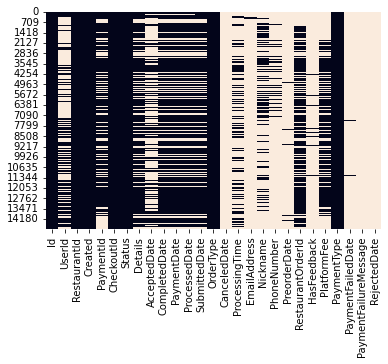

In [13]:
#lets reorder the data by order Id
orders = orders.sort_values('Id').reset_index(drop=True)

# Visualize the distribution of null values
sns.heatmap(orders.isnull(), cbar=False)

As seen in the above graph, as expected( due to guests orders) there are many missing Users Ids. To get a better undestanding of the missing data lets visualize the users Id data.

<AxesSubplot:>

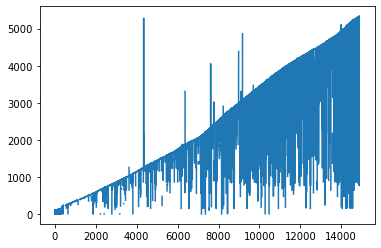

In [14]:
orders.UserId.plot()

<AxesSubplot:>

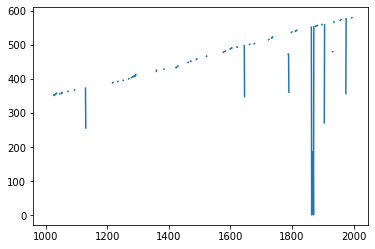

In [15]:
# zoom a little bit
orders.UserId.iloc[1000:2000].plot()

We need to fill these null value to make sure we wont lose our data. Also as seen above the best solution to fill these data is using interpolation to fill these gaps

<AxesSubplot:>

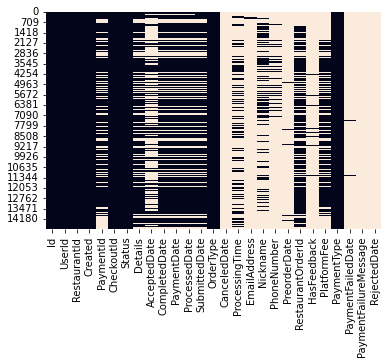

In [16]:
# fillout the missing data by interporalation method
orders.UserId = orders.UserId.interpolate()

# Visualize the distribution of null values
sns.heatmap(orders.isnull(), cbar=False)

<AxesSubplot:>

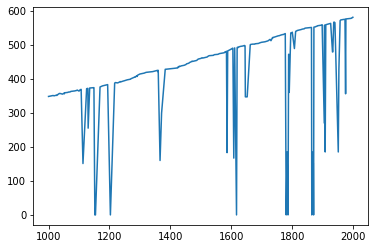

In [17]:
# zoom a little bit again
orders.UserId.iloc[1000:2000].plot()

In [18]:
# double check the mull values
orders.UserId.isnull().any()

False

We dont need all the details from order object. Lets filter the features we need to keep.

In [19]:
orders.drop(['PaymentId', 'CheckoutId',
       'Status', 'AcceptedDate', 'CompletedDate', 'PaymentDate',
       'ProcessedDate', 'SubmittedDate', 'OrderType', 'CanceledDate',
       'ProcessingTime', 'EmailAddress', 'Nickname', 'PhoneNumber',
       'PreorderDate', 'RestaurantOrderId', 'HasFeedback', 'PlatformFee',
       'PaymentType', 'PaymentFailedDate', 'PaymentFailureMessage',
       'RejectedDate'] , inplace = True, axis= 1)

In [20]:
# check the info for the remaining features
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14883 non-null  int64  
 1   UserId        14883 non-null  float64
 2   RestaurantId  14883 non-null  int64  
 3   Created       14883 non-null  object 
 4   Details       11629 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 581.5+ KB


In [21]:
# change the userId type to int
orders.UserId = orders.UserId.astype(int);
print(orders.UserId.dtype)

int64


In [22]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,14883.0,7442.802459,4296.770944,1.0,3722.5,7443.0,11163.5,14884.0
UserId,14883.0,2192.572331,1467.500858,1.0,902.5,1933.0,3399.5,5333.0
RestaurantId,14883.0,750.362293,399.393425,110.0,299.0,1029.0,1029.0,1048.0


In [23]:
# How many unique orders are there
print('unique orders:',orders.Id.nunique())

unique orders: 14883


Lets move to Details column, and investigate more.

In [24]:
orders.Details.head()

0    {"Id": 1, "Tax": 3.48, "Tip": 0, "Items": [{"C...
1    {"Id": 2, "Tax": 4.08, "Tip": 0, "Items": [{"C...
2    {"Id": 3, "Tax": 3.96, "Tip": 0, "Items": [{"C...
3    {"Id": 4, "Tax": 5.04, "Tip": 0, "Items": [{"C...
4    {"Id": 5, "Tax": 38.5200, "Tip": 0, "Items": [...
Name: Details, dtype: object

As seen above, Details feature has all the information for the ordered food. Therefor if there is an order without details we really dont need that. Lets drop the orders that do not have details.

In [25]:
print('The number of orders without details:',orders.Details.isnull().sum())
orders[orders.Details.isnull()]

The number of orders without details: 3254


,Id,UserId,RestaurantId,Created,Details
20,21,113,110,2020-04-04T16:50:05.015058Z,NaN
36,37,117,110,2020-04-09T01:45:25.487403Z,NaN
134,135,122,110,2020-04-26T05:34:00.234702Z,NaN
205,206,5,110,2020-05-04T22:34:04.55215Z,NaN
217,218,133,110,2020-05-05T04:37:32.140257Z,NaN
...,...,...,...,...,...
14848,14850,5212,121,2022-01-28T01:46:09.584711Z,NaN
14863,14865,5207,121,2022-01-30T01:42:44.675157Z,NaN
14866,14868,3752,121,2022-01-30T04:24:41.487706Z,NaN
14868,14870,5325,121,2022-01-31T02:17:49.938171Z,NaN


In [26]:
orders.dropna(subset = ['Details'], inplace = True)

Lets take the Items out from the Details object, but first lets take a look at one sample

In [27]:
orders.Details.iloc[100]

'{"Tax": 1.0800, "Tip": 0, "Items": [{"Count": 1, "Price": 9.00, "Total": 9.00, "Options": null, "MenuItem": {"Id": 198, "Name": "B+b Potatoes", "Price": 9.00, "Description": null}}], "Total": 10.0800, "Address": null, "Payment": {"Id": "pm_1GZsfWAAWyjnNOlkfa9q6xWR", "Brand": "visa", "Last4": "4242", "ExpYear": 2023, "ExpMonth": 3}, "Currency": "cad", "Subtotal": 9.00, "DeliveryFee": 0, "TaxPercentage": 12.00}'

As seen above all the information for ordered foods are combined in a dictionary format object, we need to extract the Items from the object and add it to another column. Also we will the address too, for geographical analysis.

In [28]:
orders.Details = orders.Details.apply(lambda x : json.loads(x))
orders['Address']= orders.Details.apply(lambda x : library.utils.return_value('address',x))
orders['Items']= orders.Details.apply(lambda x : library.utils.return_value('items',x))

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 14882
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            11629 non-null  int64 
 1   UserId        11629 non-null  int64 
 2   RestaurantId  11629 non-null  int64 
 3   Created       11629 non-null  object
 4   Details       11629 non-null  object
 5   Address       350 non-null    object
 6   Items         11629 non-null  object
dtypes: int64(3), object(4)
memory usage: 726.8+ KB


Rename the Created to Date and change the type to date time

In [30]:
orders.rename(columns = {'Created' : 'Date'} , inplace=True)
orders.Date = orders.Date.astype('datetime64')

Lets explore the week days orders

Text(0, 0.5, 'Order Numbers')

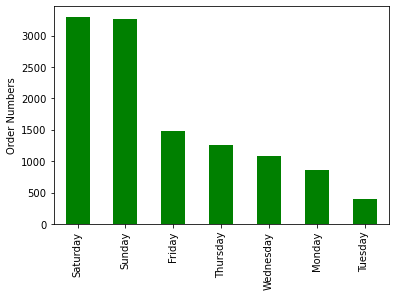

In [31]:
weekday_count = orders.Date.dt.day_name().value_counts()
weekday_count.plot(kind = 'bar', color='green')
plt.ylabel('Order Numbers')

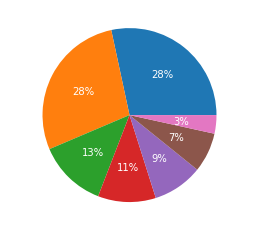

In [32]:
plt.pie(weekday_count, labels = weekday_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');
plt.show()

Text(0, 0.5, 'Order Numbers')

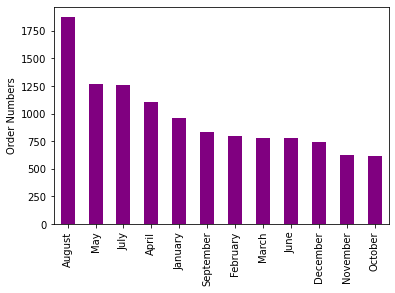

In [33]:
month_count = orders.Date.dt.month_name().value_counts()
month_count.plot(kind = 'bar', color='purple')
plt.ylabel('Order Numbers')

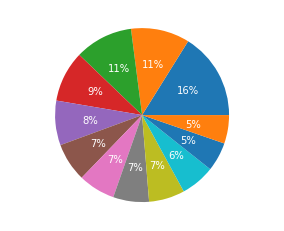

In [34]:
plt.pie(month_count, labels = month_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');
plt.show()

In [35]:
orders.head()

,Id,UserId,RestaurantId,Date,Details,Address,Items
0,1,1,110,2020-03-19 22:52:18.410595,"{'Id': 1, 'Tax': 3.48, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 29.0, 'Options': None, ..."
1,2,4,110,2020-03-20 19:31:44.139248,"{'Id': 2, 'Tax': 4.08, 'Tip': 0, 'Items': [{'C...","{'Id': 2, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ..."
2,3,1,110,2020-03-22 05:06:22.862927,"{'Id': 3, 'Tax': 3.96, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 24.0, 'Options': None, ..."
3,4,115,110,2020-03-22 06:52:54.185165,"{'Id': 4, 'Tax': 5.04, 'Tip': 0, 'Items': [{'C...","{'Id': 3, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ..."
4,5,1,110,2020-03-26 05:40:08.022949,"{'Id': 5, 'Tax': 38.52, 'Tip': 0, 'Items': [{'...","{'Id': 1, 'Lat': 49.28168059999999, 'Lng': -12...","[{'Count': 5, 'Price': 18.0, 'Total': 90.0, 'O..."


In [36]:
orders.isnull().sum()

Id                  0
UserId              0
RestaurantId        0
Date                0
Details             0
Address         11279
Items               0
dtype: int64

We know most of the orders do not have address as they were for dine in, not delivery.

In [37]:
# There are some users that have ordered multiple times, lets check how many of them exists
orders.UserId.duplicated().sum()

6988

### 3. Feedback Data Wrangling

In [38]:
feedback.head()

,Id,VirtualMenuStar,OrderingProcessStar,OnlinePaymentStar,OtherComments,UserOrderId,CreatedDate
0,802,5,5,5,NaN,14777,2022-01-16T00:43:33.844237Z
1,801,5,1,5,Food arrived 50 minutes later than the request...,14479,2021-12-08T17:26:32.295815Z
2,800,5,5,5,Smile,13892,2021-09-21T05:21:33.518309Z
3,799,5,5,5,NaN,13886,2021-09-20T02:11:48.826812Z
4,798,5,5,5,Your hammer sandwich that you say is Spicy but...,13607,2021-08-29T23:56:25.635394Z


Lets filter the feature we need from the feedback dataset

In [39]:
feedback.columns

Index(['Id', 'VirtualMenuStar', 'OrderingProcessStar', 'OnlinePaymentStar',
       'OtherComments', 'UserOrderId', 'CreatedDate'],
      dtype='object')

In [40]:
feedback.drop(['VirtualMenuStar', 'OnlinePaymentStar', 'CreatedDate'], axis = 1, inplace=True)

In [41]:
feedback.rename(columns={'OrderingProcessStar' : 'Rating', 'OtherComments' :'Comments','UserOrderId': 'OrderId'}, inplace= True)

In [42]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        802 non-null    int64 
 1   Rating    802 non-null    int64 
 2   Comments  155 non-null    object
 3   OrderId   802 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 25.2+ KB


In [43]:
print('From all the available orders', len(feedback.Rating), 'of them have rating.')

From all the available orders 802 of them have rating.


Text(0, 0.5, 'Order Numbers')

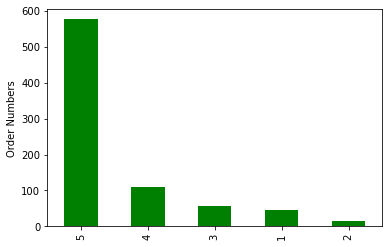

In [44]:
# Explore the distribution of ratings
rating_count = feedback.Rating.value_counts()

rating_count.plot(kind = 'bar', color='green')
plt.ylabel('Order Numbers')

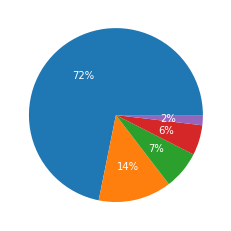

In [45]:
plt.pie(rating_count,labels = rating_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');

### 4. Items Data Wrangling

In [82]:
items.head()

,Id,Price,MenuBookCategoryId,MenuBookId,AvailableDays,OrderIndex,IsAvailable,InfoId,ViewCount,DiscountId,IsHidden
0,8345,0.9,1150,240,NaN,0,True,8258,0,NaN,False
1,8346,7.0,1150,240,NaN,0,True,8259,0,NaN,False
2,2046,18.0,343,172,NaN,0,True,1959,0,NaN,False
3,2047,18.0,343,172,NaN,0,True,1960,0,NaN,False
4,2048,18.0,343,172,NaN,0,True,1961,0,NaN,False


In [47]:
items.columns

Index(['Id', 'Price', 'MenuBookCategoryId', 'MenuBookId', 'AvailableDays',
       'OrderIndex', 'IsAvailable', 'InfoId', 'ViewCount', 'DiscountId',
       'IsHidden'],
      dtype='object')

In [90]:
infoId = items[items.Id == 82659].InfoId.values[0]
items_info[items_info.Id == infoId]

,Id,Name,Description,PhotoUrl,TagsString,Rating,RatingCount,Calories,Fiber,Carbohydrate,SearchVector,IsGlobal,Property,Sku,Type
83350,82536,Shoestring Fries (G),NaN,https://res.cloudinary.com/fooreco/image/uploa...,Potatoes,5.0,2,NaN,NaN,NaN,'fri':2 'g':3 'potato':4 'shoestr':1,False,NaN,NaN,Main


All the information for the foods are in the iteminfo table.

In [48]:
items_info.head()

,Id,Name,Description,PhotoUrl,TagsString,Rating,RatingCount,Calories,Fiber,Carbohydrate,SearchVector,IsGlobal,Property,Sku,Type
0,81465,Popina Bottled Water,NaN,https://res.cloudinary.com/fooreco/image/uploa...,NaN,NaN,0,NaN,NaN,NaN,'bottl':2 'popina':1 'water':3,False,NaN,NaN,Drink
1,81456,"Mayhem, Pinot Gris (bottle)",750 ML,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bottl':4 'gris':3 'mayhem':1 'pin...,False,NaN,NaN,Liquor
2,81457,"Bartier Bros, Merlot (bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bartier':1 'bottl':4 'bros':2 'me...,False,NaN,NaN,Liquor
3,81458,"Joie Brut, sparkling wine (1/2 Bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'1/2':5 'alcohol':7 'bottl':6 'brut':2 'joie':...,False,NaN,NaN,Liquor
4,81460,"Powell Street, Ode to Citra (473 Ml)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'473':6 'alcohol':8 'citra':5 'ml':7 'ode':3 '...,False,NaN,NaN,Liquor


Lets merge the item with iteminfo.

In [93]:
itemsInfo_df = pd.merge(items,items_info, left_on = 'InfoId' , right_on = 'Id', how = 'left' )

In [94]:
itemsInfo_df.columns

Index(['Id_x', 'Price', 'MenuBookCategoryId', 'MenuBookId', 'AvailableDays',
       'OrderIndex', 'IsAvailable', 'InfoId', 'ViewCount', 'DiscountId',
       'IsHidden', 'Id_y', 'Name', 'Description', 'PhotoUrl', 'TagsString',
       'Rating', 'RatingCount', 'Calories', 'Fiber', 'Carbohydrate',
       'SearchVector', 'IsGlobal', 'Property', 'Sku', 'Type'],
      dtype='object')

In [95]:
# Just keep the features we need
itemsInfo_df = itemsInfo_df.drop([ 'MenuBookCategoryId', 'MenuBookId', 'AvailableDays',
       'OrderIndex', 'IsAvailable', 'InfoId', 'DiscountId','Rating','RatingCount',
       'IsHidden', 'PhotoUrl', 'Calories', 'Fiber', 'Carbohydrate',
       'IsGlobal', 'Property', 'Sku','Id_y'] ,axis = 1)

In [96]:
itemsInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68100 entries, 0 to 68099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id_x          68100 non-null  int64  
 1   Price         67938 non-null  float64
 2   ViewCount     68100 non-null  int64  
 3   Name          68082 non-null  object 
 4   Description   48742 non-null  object 
 5   TagsString    34591 non-null  object 
 6   SearchVector  68081 non-null  object 
 7   Type          68082 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.7+ MB


In [97]:
itemsInfo_df.rename(columns={'Id_x' : 'Id'}, inplace = True)

In [54]:
# check the items that do not have description
filter = itemsInfo_df.Description.isnull()

empty_desc = itemsInfo_df[filter].shape[0]

In [98]:
print('There are',empty_desc,'item with no description')

There are 19358 item with no description


In [56]:
#check the type for the items with no description
itemsInfo_df[filter].Type.value_counts()

Main      19251
Drink        48
Liquor       32
Side          9
Name: Type, dtype: int64

As seen above many of the items that do not have description are Main, and we will keep them for now.

Almost all the items are categorized as Main, very few items with other types. Lets see which items appear the most in the menus.

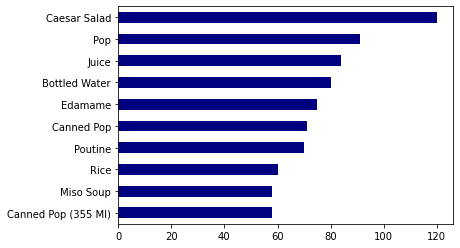

In [57]:
# Lets see among all the availble food which ones are the most common in all the availbale restauarants
itemsInfo_df['Name'].value_counts()[0:10].plot(kind = 'barh', fontsize= 10, color='navy').invert_yaxis()

In [58]:
#if we remove filter out the juices 
mask = (itemsInfo_df.Name != 'Pop') & (itemsInfo_df.Name != 'Juice') & (itemsInfo_df.Name != 'Bottled Water') & (itemsInfo_df.Name != 'Canned Pop')
itemsInfo_masked = itemsInfo_df[mask]

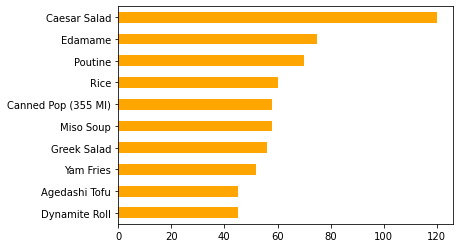

In [59]:
itemsInfo_masked['Name'].value_counts()[0:10].plot(kind = 'barh',fontsize= 10, color='orange').invert_yaxis()

In [106]:
itemsInfo_df[itemsInfo_df.Id == 82659]

,Id,Price,ViewCount,Name,Description,TagsString,SearchVector,Type
67316,82659,4.5,2877,Shoestring Fries (G),NaN,Potatoes,'fri':2 'g':3 'potato':4 'shoestr':1,Main


### 5 .Finalize data cleanup 

Lets merge the feedback dataset with the order dataset.

In [60]:
feedback.head()

,Id,Rating,Comments,OrderId
0,802,5,NaN,14777
1,801,1,Food arrived 50 minutes later than the request...,14479
2,800,5,Smile,13892
3,799,5,NaN,13886
4,798,5,Your hammer sandwich that you say is Spicy but...,13607


In [61]:
review.head()

,Id,Message,Rating,CreatedDate,UserId,MenuBookItemInfoId,Status,Bitter,Salty,Savory,Sour,Sweet
0,84,rrrrrrr,4,2019-09-30T20:46:57.829856Z,1,7,3,NaN,NaN,NaN,NaN,NaN
1,76,⁦✌️⁩⁦✌️⁩👍👍😍,3,2019-07-13T04:18:21.348956Z,4,320,3,NaN,NaN,NaN,NaN,NaN
2,74,Best sooooooosis,5,2019-06-17T04:16:12.559684Z,105,320,3,NaN,NaN,NaN,NaN,NaN
3,47,Wow It is so good,5,2019-01-02T21:12:35.894906Z,8,40,3,NaN,NaN,NaN,NaN,NaN
4,44,Wow so good,4,2018-12-24T08:18:51.017771Z,8,299,3,NaN,NaN,NaN,NaN,NaN


In [62]:
orders.head()

,Id,UserId,RestaurantId,Date,Details,Address,Items
0,1,1,110,2020-03-19 22:52:18.410595,"{'Id': 1, 'Tax': 3.48, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 29.0, 'Options': None, ..."
1,2,4,110,2020-03-20 19:31:44.139248,"{'Id': 2, 'Tax': 4.08, 'Tip': 0, 'Items': [{'C...","{'Id': 2, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ..."
2,3,1,110,2020-03-22 05:06:22.862927,"{'Id': 3, 'Tax': 3.96, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 24.0, 'Options': None, ..."
3,4,115,110,2020-03-22 06:52:54.185165,"{'Id': 4, 'Tax': 5.04, 'Tip': 0, 'Items': [{'C...","{'Id': 3, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ..."
4,5,1,110,2020-03-26 05:40:08.022949,"{'Id': 5, 'Tax': 38.52, 'Tip': 0, 'Items': [{'...","{'Id': 1, 'Lat': 49.28168059999999, 'Lng': -12...","[{'Count': 5, 'Price': 18.0, 'Total': 90.0, 'O..."


In [63]:
order_feedback= pd.merge(orders , feedback , left_on= 'Id' , right_on= 'OrderId' , how='left')
order_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 11628
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id_x          11629 non-null  int64         
 1   UserId        11629 non-null  int64         
 2   RestaurantId  11629 non-null  int64         
 3   Date          11629 non-null  datetime64[ns]
 4   Details       11629 non-null  object        
 5   Address       350 non-null    object        
 6   Items         11629 non-null  object        
 7   Id_y          802 non-null    float64       
 8   Rating        802 non-null    float64       
 9   Comments      155 non-null    object        
 10  OrderId       802 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1.1+ MB


In [64]:
order_feedback.drop('OrderId', axis = 1, inplace= True)
order_feedback.head()

,Id_x,UserId,RestaurantId,Date,Details,Address,Items,Id_y,Rating,Comments
0,1,1,110,2020-03-19 22:52:18.410595,"{'Id': 1, 'Tax': 3.48, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 29.0, 'Options': None, ...",NaN,NaN,NaN
1,2,4,110,2020-03-20 19:31:44.139248,"{'Id': 2, 'Tax': 4.08, 'Tip': 0, 'Items': [{'C...","{'Id': 2, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ...",NaN,NaN,NaN
2,3,1,110,2020-03-22 05:06:22.862927,"{'Id': 3, 'Tax': 3.96, 'Tip': 0, 'Items': [{'C...","{'Id': 1, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 24.0, 'Options': None, ...",NaN,NaN,NaN
3,4,115,110,2020-03-22 06:52:54.185165,"{'Id': 4, 'Tax': 5.04, 'Tip': 0, 'Items': [{'C...","{'Id': 3, 'Area': 'BC', 'City': 'Coquitlam', '...","[{'Count': 1, 'Price': 18.0, 'Options': None, ...",NaN,NaN,NaN
4,5,1,110,2020-03-26 05:40:08.022949,"{'Id': 5, 'Tax': 38.52, 'Tip': 0, 'Items': [{'...","{'Id': 1, 'Lat': 49.28168059999999, 'Lng': -12...","[{'Count': 5, 'Price': 18.0, 'Total': 90.0, 'O...",NaN,NaN,NaN


As seen before Items feature may have more than one item, below we will extract and split them in different rows for better analysis

In [65]:
#rename the columns 
order_feedback = order_feedback.rename(columns={'Id_x' : 'OrderId', 'Id_y' : 'RatingId'})
data_list = library.utils.extract_items(order_feedback)

In [66]:
orders_user_feedback =  pd.DataFrame(data_list, columns =['OrderId','UserId','Item','RestaurantId','Date','Rating','Comments','Address','Count'])

In [67]:
orders_user_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26821 entries, 0 to 26820
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       26821 non-null  int64         
 1   UserId        26821 non-null  int64         
 2   Item          26821 non-null  object        
 3   RestaurantId  26821 non-null  int64         
 4   Date          26821 non-null  datetime64[ns]
 5   Rating        1963 non-null   float64       
 6   Comments      412 non-null    object        
 7   Address       905 non-null    object        
 8   Count         26821 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [68]:
orders_user_feedback.OrderId.nunique()

11629

In [69]:
orders_user_feedback['ItemId'] = orders_user_feedback.Item.apply(lambda x : library.utils.return_value('id',x))
orders_user_feedback['ItemName'] = orders_user_feedback.Item.apply(lambda x : library.utils.return_value('name',x))

In [70]:
full_data =  pd.merge(orders_user_feedback,itemsInfo_df , left_on= 'ItemId', right_on= 'Id', how='left')

In [71]:
full_data.columns

Index(['OrderId', 'UserId', 'Item', 'RestaurantId', 'Date', 'Rating',
       'Comments', 'Address', 'Count', 'ItemId', 'ItemName', 'Id', 'Price',
       'ViewCount', 'Name', 'Description', 'SearchVector', 'Type'],
      dtype='object')

In [72]:
filter = full_data['ItemName'] == full_data['Name']
full_data = full_data[filter]

In [73]:
full_data.isna().sum()

OrderId             0
UserId              0
Item                0
RestaurantId        0
Date                0
Rating          22352
Comments        23754
Address         23700
Count               0
ItemId              0
ItemName            0
Id                  0
Price            3137
ViewCount           0
Name                0
Description     10084
SearchVector        0
Type                0
dtype: int64

In [74]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24109 entries, 15 to 26820
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       24109 non-null  int64         
 1   UserId        24109 non-null  int64         
 2   Item          24109 non-null  object        
 3   RestaurantId  24109 non-null  int64         
 4   Date          24109 non-null  datetime64[ns]
 5   Rating        1757 non-null   float64       
 6   Comments      355 non-null    object        
 7   Address       409 non-null    object        
 8   Count         24109 non-null  int64         
 9   ItemId        24109 non-null  int64         
 10  ItemName      24109 non-null  object        
 11  Id            24109 non-null  float64       
 12  Price         20972 non-null  float64       
 13  ViewCount     24109 non-null  float64       
 14  Name          24109 non-null  object        
 15  Description   14025 non-null  objec

In [77]:
full_data.head()

,OrderId,UserId,Item,RestaurantId,Date,Rating,Comments,Address,Count,ItemId,ItemName,Id,Price,ViewCount,Name,Description,SearchVector,Type
15,8,113,"{'Id': 211, 'Name': 'Tableside Spinach Salad',...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,Tableside Spinach Salad,211.0,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
16,8,113,"{'Id': 218, 'Name': 'King Crab', 'Price': 27.0...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,King Crab,218.0,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
443,293,4,"{'id': 440, 'name': 'Joojeh Kabab With Rice', ...",121,2020-05-13 01:20:59.267256,NaN,NaN,None,1,440,Joojeh Kabab With Rice,440.0,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main
444,294,3,"{'id': 455, 'name': 'Regular Coffee', 'price':...",121,2020-05-13 17:34:35.519326,NaN,NaN,None,1,455,Regular Coffee,455.0,1.5,9.0,Regular Coffee,NaN,'coffe':2 'regular':1,Drink
445,297,142,"{'id': 540, 'name': 'Kashk Bademjan', 'price':...",121,2020-05-14 00:08:48.756423,NaN,NaN,None,1,540,Kashk Bademjan,540.0,9.9,485.0,Kashk Bademjan,"Barbequed eggplant, lentils, fried onions, gar...",'bademjan':2 'bbq':8 'egg':10 'eggplant':6 'ga...,Main


In [78]:
full_data.drop(['Item','ItemName','Id'], axis = 1 , inplace=True)


In [79]:
full_data.drop('Address', axis = 1).nunique()

OrderId         10868
UserId           4539
RestaurantId        7
Date            10868
Rating              5
Comments          141
Count              12
ItemId            359
Price              62
ViewCount         275
Name              320
Description       225
SearchVector      325
Type                5
dtype: int64

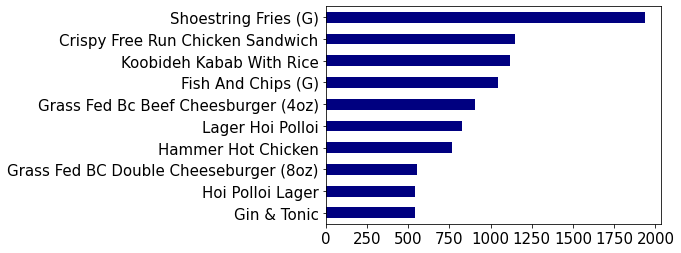

In [80]:
#top 10 orders among all restaurants
full_data['Name'].value_counts()[0:10].plot(kind = 'barh', fontsize=15, color='navy').invert_yaxis()


In [ ]:
full_data['RestaurantId'].value_counts()

1029    16451
121      3281
1034     2600
299      1748
1048       17
1040        9
110         3
Name: RestaurantId, dtype: int64

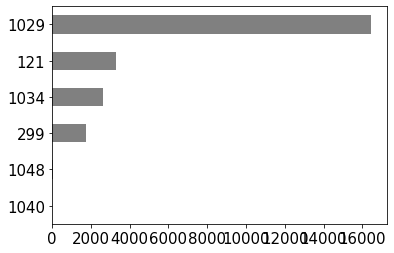

In [ ]:
# compare the number od orders in different restaurants
full_data['RestaurantId'].value_counts()[0:6].plot(kind = 'barh', fontsize=15, color='gray').invert_yaxis()

### Calculate the sparsity of the Rating Data

In [ ]:
user_rating_food = full_data[['UserId','Rating','Name']]
rating_count = user_rating_food.Rating.count()
users_count = user_rating_food.UserId.nunique()
food_count = user_rating_food.Name.nunique()
denominator = food_count * users_count
sparsity = 1 - (rating_count * 1.0 )/denominator
print('the sparsity is: %f', sparsity)

the sparsity is: %f 0.9987903447896013


In [ ]:
# save th final cleaned data
fpath = '../data'
library.utils.save_file(full_data,'full_data.csv',fpath)

A file already exists with this name.



In [107]:
fpath = '../data'
library.utils.save_file(itemsInfo_df,'itemsInfo_full.csv',fpath)
itemsInfo_df

Writing file.  "../data/itemsInfo_full.csv"


,Id,Price,ViewCount,Name,Description,TagsString,SearchVector,Type
0,8345,0.9,0,Cookie,Freshly baked cookies. One order comes with on...,NaN,'cooki':1,Main
1,8346,7.0,0,12 Cookies,Freshly baked cookies. One order comes with tw...,NaN,'12':1 'cooki':2,Main
2,2046,18.0,0,Sausage Hash-n-eggs,NaN,NaN,'egg':5 'hash':3 'hash-n-egg':2 'n':4 'sausag':1,Main
3,2047,18.0,0,Ham Hash-n-eggs,NaN,NaN,'egg':5 'ham':1 'hash':3 'hash-n-egg':2 'n':4,Main
4,2048,18.0,0,Debakon Hash-n-eggs,DeBakon with hash-n-eggs.,NaN,'debakon':1 'egg':5 'hash':3 'hash-n-egg':2 'n':4,Main
...,...,...,...,...,...,...,...,...
68095,83491,3.2,1,NaN,NaN,NaN,NaN,NaN
68096,83492,4.8,3,NaN,NaN,NaN,NaN,NaN
68097,83478,3.8,3,Shio Koji Pickles,"White radish, carrot, mini cucumber, Japanese ...",Wheat Soy Sesame,'koji':2 'pickl':3 'sesam':6 'shio':1 'soy':5 ...,Main
68098,83501,8.0,3,NaN,NaN,NaN,NaN,NaN
